<a href="https://colab.research.google.com/github/udyanojha/CertificateMakerCumMailer/blob/main/Image_Classification_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
install.packages("keras")

library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
fashion_mnist <- dataset_fashion_mnist()

In [21]:
fashion_mnist
length(fashion_mnist$train$x)

$train
$train$x
, , 1

         [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
    [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [13,]    0    0    0    0    0    0    0    0    0     0     0     0     1
   [14,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [15,]    0    0    0    0    0    0    0    0    0     0     0     0     1
   [16,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [17,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [18,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [19,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [20,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [21,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [22,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [23,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [24,]    0    0    0    1    0   10   87   61  100    82    93   116    65
   [25,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [26,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [27,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [28,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [29,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [30,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [31,]    0    0    0    0    0    0    0    0    0     0     0     0     4
   [32,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [33,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [34,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [35,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [36,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [37,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [38,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [39,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [40,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [41,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [42,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [43,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [44,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [45,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [46,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [47,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [48,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [49,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [50,]    0    0    0    0    0    0    0    0    0     0     0     0     0

[1] 47040000

In [23]:


x_train <- fashion_mnist$train$x/255
y_train <- fashion_mnist$train$y

x_test <- fashion_mnist$test$x/255
y_test <- fashion_mnist$test$y

In [ ]:
image1 <- as.data.frame(x_train[1, , ])
colnames(image1) <- seq_len(ncol(image1))
image1$y <- seq_len(nrow(image1))
image1 <- gather(image1, "x", "value", -y)
image1$x <- as.integer(image1$x)

ggplot(image1, aes(x = x, y = y, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "black") +
  scale_y_reverse() +
  theme(aspect.ratio = 1)

In [ ]:
model <- keras_model_sequential()
model %>%
  layer_flatten(input_shape = c(28, 28)) %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')
model

In [27]:
model %>% compile(
  optimizer = 'adam', 
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)

In [35]:
model_fit <- model %>% fit(x_train, y_train, epochs = 10, validation_data = list(x_test, y_test))

`geom_smooth()` using formula 'y ~ x'



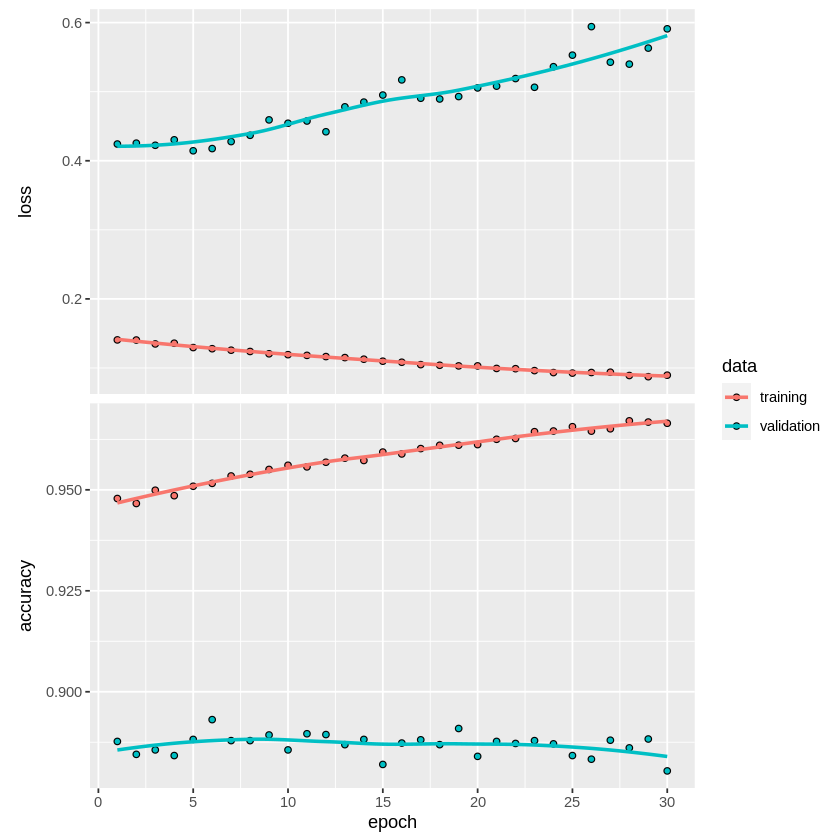

In [40]:
plot(model_fit)

In [45]:
print(model_fit)


Final epoch (plot to see history):
        loss: 0.08958
    accuracy: 0.9665
    val_loss: 0.591
val_accuracy: 0.8804 


In [47]:
predictions <- model %>% predict(fashion_mnist$test$x)

In [51]:
head(predictions, 3)

0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0


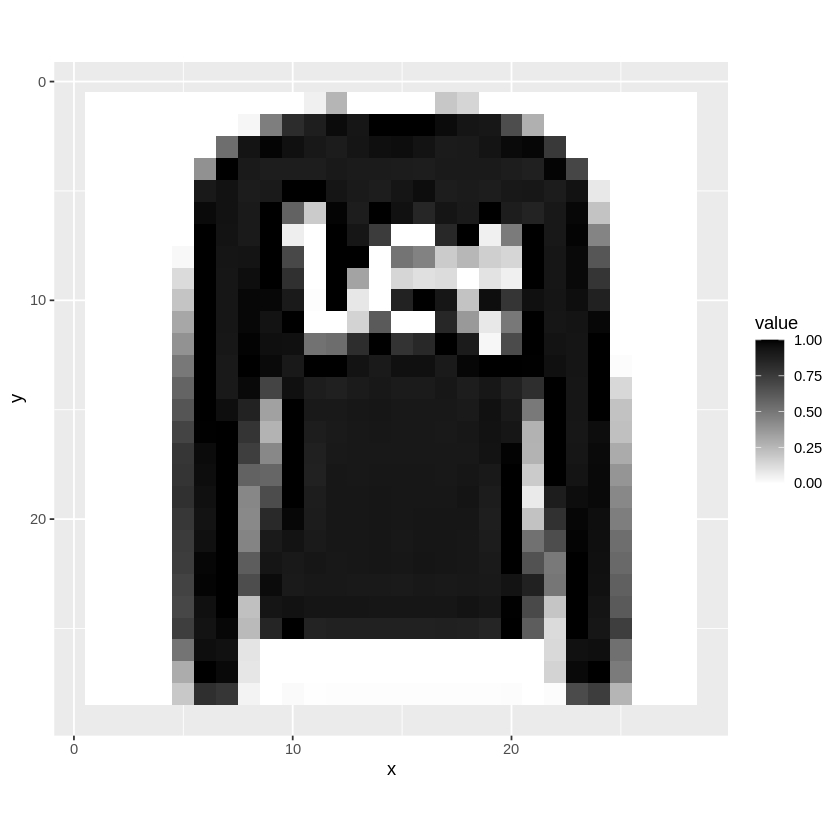

In [53]:
image1 <- as.data.frame(x_test[2, , ])
colnames(image1) <- seq_len(ncol(image1))
image1$y <- seq_len(nrow(image1))
image1 <- gather(image1, "x", "value", -y)
image1$x <- as.integer(image1$x)

ggplot(image1, aes(x = x, y = y, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "black") +
  scale_y_reverse() +
  theme(aspect.ratio = 1)